### Download weights from drive before running this notebook

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from utils.utils_stylegan2 import convert_images_to_uint8

In [2]:
def generate_and_plot_images(gen, seed, w_avg, truncation_psi=1):
    """ plot images from generator output """
    
    fig, ax = plt.subplots(1,3,figsize=(15,15))
    for i in range(3):
    
        # creating random latent vector
        rnd = np.random.RandomState(seed)
        z = rnd.randn(1, 512).astype('float32')

        # running mapping network
        dlatents = gen.mapping_network(z)
        # adjusting dlatents depending on truncation psi, if truncatio_psi = 1, no adjust
        dlatents = w_avg + (dlatents - w_avg) * truncation_psi 
        # running synthesis network
        out = gen.synthesis_network(dlatents)

        #converting image/s to uint8
        img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)

        #plotting images
        ax[i].axis('off')
        img_plot = ax[i].imshow(img.numpy()[0])
        
        seed += 1

### Machine configuration

In [3]:
impl = 'cuda' # 'ref' if cuda is not available in your machine
gpu = True # False if tensorflow cpu is used

# Load stylegan2 generator

In [4]:
from stylegan2_generator import StyleGan2Generator

#### Loading ffhq stylegan2

Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
Loaded ffhq generator weights!


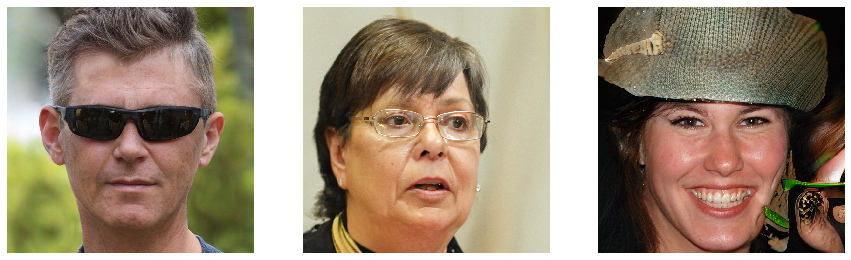

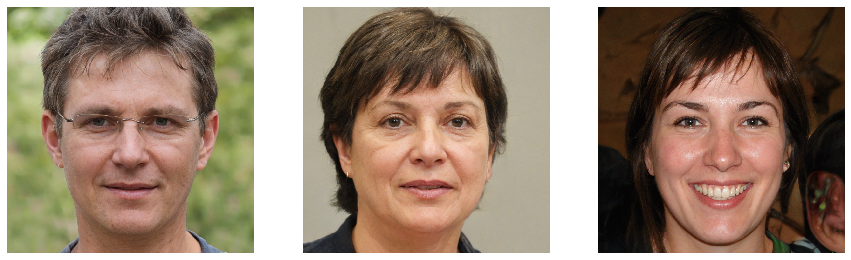

In [ ]:
weights_name = '/kaggle/input/ffhq-npy' # face model trained by Nvidia

# instantiating generator network
generator = StyleGan2Generator(weights=weights_name, impl=impl, gpu=gpu)

# loading w average
w_average = np.load('weights/{}_dlatent_avg.npy'.format(weights_name))

# not using truncation
generate_and_plot_images(generator, seed=96, w_avg=w_average)

# using truncation 0.5
generate_and_plot_images(generator, seed=96, w_avg=w_average, truncation_psi=0.5)